<a href="https://colab.research.google.com/github/harika2024/Calculator/blob/main/Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hi')

hi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
np.random.randint(1,100,15)

array([39, 20, 78, 91, 60, 46, 30, 46, 19, 19, 19, 46, 88, 72, 78])

In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Preprocessing

In [ ]:
!unzip /content/drive/MyDrive/UTKFace.zip

Streaming output truncated to the last 5000 lines.
  inflating: UTKFace/52_0_3_20170113184200775.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170113190623929.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170117190840617.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119160357804.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119181010188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200211340.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200241996.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200259595.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200407188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204331863.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204337838.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205638160.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205639336.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205641007.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205647136.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_201701

In [ ]:
fldr="UTKFace"
files=os.listdir(fldr)
images=[]

for fle in files:
  total=fldr+'/'+fle
  image=cv2.imread(total)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)


In [ ]:

age_labels = {0:"18 & Below", 1:"19-28",2:"29-38",3:"39-48",4:"49-58",5:"59-74",6:"75 & Above"}
ages=[]
genders=[]
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  if age<19:
    ages.append(0)
  elif age<29:
    ages.append(1)
  elif age<39:
    ages.append(2)
  elif age<49:
    ages.append(3)
  elif age<59:
    ages.append(4)
  elif age<75:
    ages.append(5)
  else:
    ages.append(6)
  genders.append(gender)

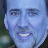

In [ ]:
cv2_imshow(images[37])

In [ ]:

print(ages[37])
print(genders[37])

4
0


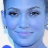

In [ ]:
cv2_imshow(images[54])

In [ ]:
print(ages[54])
print(genders[54])

1
1


In [ ]:
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

male = 0
female = 1

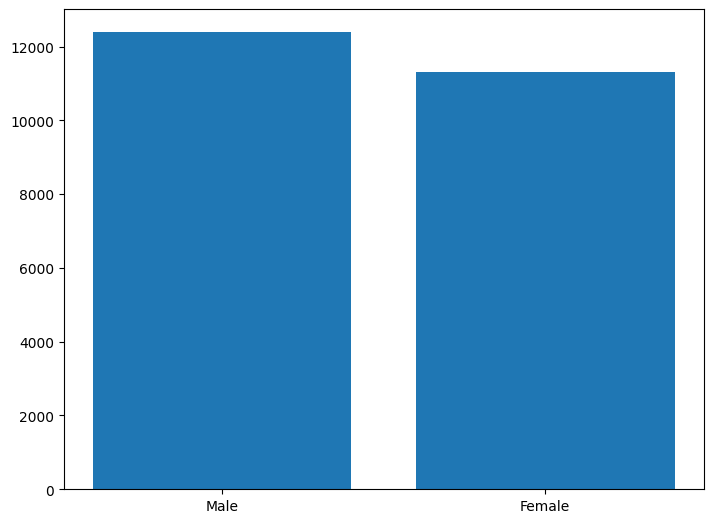

In [ ]:
values, counts = np.unique(genders_f, return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
ax.bar(gender,list(counts))
plt.show()

<BarContainer object of 7 artists>

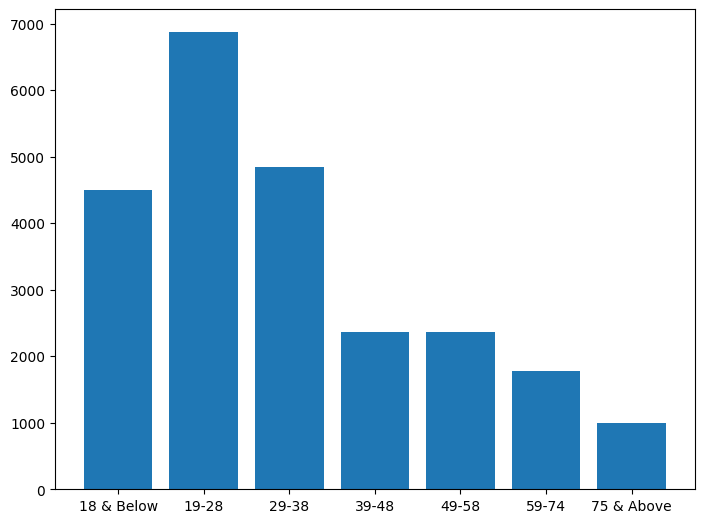

In [ ]:
values1, counts1 = np.unique(ages_f, return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(age_labels.values()),list(counts1))

In [ ]:
labels = []
i=0
while i < len(ages):
  label = []
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [ ]:
labels_f = np.array(labels)
images_f_2 = images_f/255
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.1)

In [ ]:
Y_train_2 = [Y_train[:,1], Y_train[:,0]]
Y_test_2 = [Y_test[:,1], Y_test[:,0]]

# Model

In [ ]:
def Convolution(input_tensor,filters):
  x = Conv2D(filters=filters,kernel_size=(3, 3),kernel_regularizer=l2(0.008))(input_tensor)
  x = Dropout(0.1)(x)
  x= Activation('relu')(x)
  return x

In [ ]:
def model(input_shape):
  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(2,2) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(2,2) (conv_2)
  conv_3 = Convolution(maxp_2,64)
  maxp_3 = MaxPooling2D(2,2) (conv_3)
  flatten= Flatten() (maxp_3)
  dense_1= Dense(512,activation='relu')(flatten)
  dense_2= Dense(512,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='gender_out')(drop_1)
  output_2= Dense(7,activation="softmax",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","sparse_categorical_crossentropy"], optimizer="Adam",
	metrics=["accuracy"])

  return model

In [ ]:
Model=model((48,48,3))
Model.summary()
History=Model.fit(X_train,Y_train_2,batch_size=50,validation_data=(X_test,Y_test_2),epochs=10)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 46, 46, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 46, 46, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 46, 46, 32)           0         ['dropout[0][0]']             
                                                                                              

In [ ]:
Model.save('drive/MyDrive/saved_models/new_saved_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
Model.evaluate(X_test,Y_test_2)
pred=Model.predict(X_test)
print(pred[1])

75/75 [==============================] - 3s 42ms/step
[[2.07474711e-03 9.25523811e-04 8.26984365e-03 ... 1.20004989e-01
  3.81711811e-01 4.61559564e-01]
 [2.36989297e-02 5.54355569e-02 1.11521944e-01 ... 1.50705799e-01
  2.44316265e-01 3.26789171e-01]
 [6.43291771e-02 6.06597900e-01 2.60326475e-01 ... 1.52440742e-02
  2.11663288e-03 1.00667516e-04]
 ...
 [3.56927700e-03 8.16006884e-02 2.30959237e-01 ... 2.64168471e-01
  1.44157350e-01 3.15416455e-02]
 [4.97677103e-02 1.61345661e-01 1.84509724e-01 ... 1.65415719e-01
  2.22859383e-01 1.15434855e-01]
 [9.99625325e-01 8.75245969e-05 9.01824387e-05 ... 5.97386934e-05
  6.60004080e-05 2.17657234e-05]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1225
           1       0.89      0.87      0.88      1146

    accuracy                           0.89      2371
   macro avg       0.89      0.89      0.89      2371
weighted avg       0.89      0.89      0.89      2371



<ipython-input-24-57f66cd49068>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


<Axes: >

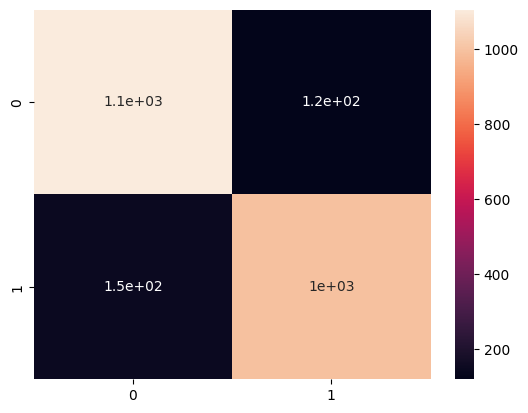

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i+=1
report=classification_report(Y_test_2[0], Pred_l)
print(report)
results = confusion_matrix(Y_test_2[0], Pred_l)
sns.heatmap(results, annot=True)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       450
           1       0.62      0.66      0.64       681
           2       0.43      0.41      0.42       477
           3       0.20      0.04      0.07       209
           4       0.36      0.45      0.40       246
           5       0.43      0.57      0.49       192
           6       0.63      0.57      0.60       116

    accuracy                           0.56      2371
   macro avg       0.50      0.51      0.49      2371
weighted avg       0.54      0.56      0.54      2371



<Axes: >

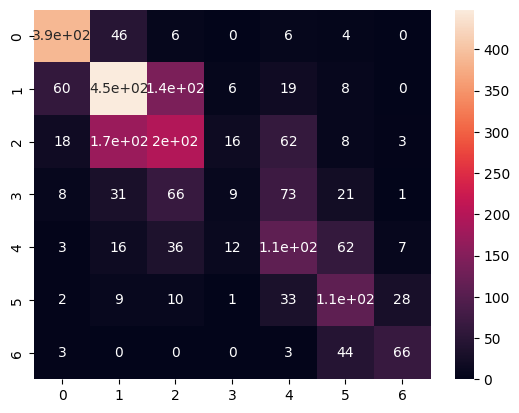

In [ ]:
i=0
Pred_A=[]
while(i<len(pred[1])):
  Pred_A.append(int(np.argmax(pred[1][i])))
  i+=1
report=classification_report(Y_test_2[1], Pred_A)
print(report)
results = confusion_matrix(Y_test_2[1], Pred_A)
sns.heatmap(results, annot=True)

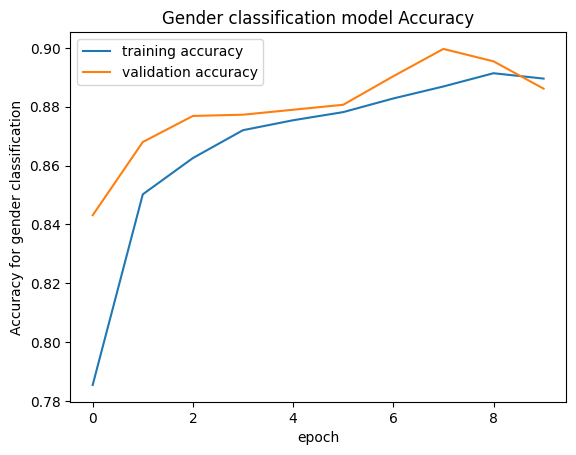

In [ ]:
# plotting for Gender Classification Accuracy
plt.plot(History.history['gender_out_accuracy'], label = 'training accuracy')
plt.plot(History.history['val_gender_out_accuracy'], label = 'validation accuracy')
plt.title('Gender classification model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy for gender classification')
plt.legend()
plt.show()

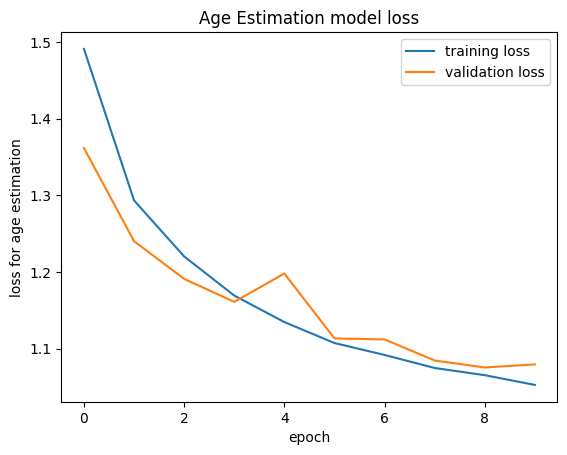

In [ ]:
# plotting the mse loss for age regression
plt.plot(History.history['age_out_loss'], label = 'training loss')
plt.plot(History.history['val_age_out_loss'], label = 'validation loss')
plt.title('Age Estimation model loss')
plt.xlabel('epoch')
plt.ylabel('loss for age estimation')
plt.legend()

plt.show()

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print(image_test.shape)
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  age_f=list(age_labels.values())
  gender_f=['Male','Female']
  print(age_f)
  age=np.argmax(pred_1[1])
  gender=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ age_f[age])
  print("Predicted Gender: "+ gender_f[gender])

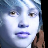

(48, 48, 3)
1/1 [==============================] - 0s 76ms/step
['18 & Below', '19-28', '29-38', '39-48', '49-58', '59-74', '75 & Above']
Predicted Age: 18 & Below
Predicted Gender: Female


<ipython-input-28-8fd372f3136f>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender=int(np.round(pred_1[0][0]))


In [ ]:
test_image(57,images_f,images_f_2,Model)

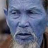

(48, 48, 3)
1/1 [==============================] - 0s 46ms/step
['18 & Below', '19-28', '29-38', '39-48', '49-58', '59-74', '75 & Above']
Predicted Age: 59-74
Predicted Gender: Male



<ipython-input-28-8fd372f3136f>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender=int(np.round(pred_1[0][0]))


In [ ]:
test_image(137,images_f,images_f_2,Model)
print()

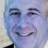

(48, 48, 3)
1/1 [==============================] - 0s 43ms/step
['18 & Below', '19-28', '29-38', '39-48', '49-58', '59-74', '75 & Above']
Predicted Age: 59-74
Predicted Gender: Male


<ipython-input-28-8fd372f3136f>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender=int(np.round(pred_1[0][0]))


In [ ]:
test_image(502,images_f,images_f_2,Model)